In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
test_data=pd.read_excel("Test_set.xlsx")

In [4]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
final_dataset=train_data.append(test_data,sort=False)

In [6]:
final_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
final_dataset['date']=final_dataset['Date_of_Journey'].str.split("/").str[0]
final_dataset['Month']=final_dataset['Date_of_Journey'].str.split("/").str[1]
final_dataset['Year']=final_dataset['Date_of_Journey'].str.split("/").str[2]


In [8]:
final_dataset.head()
final_dataset=final_dataset.drop(['Date_of_Journey'],axis=1)

In [9]:
final_dataset

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [10]:
final_dataset.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
date                object
Month               object
Year                object
dtype: object

In [11]:
final_dataset['date']=final_dataset['date'].astype(int)
final_dataset['Month']=final_dataset['Month'].astype(int)
final_dataset['Year']=final_dataset['Year'].astype(int)

In [12]:
final_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
final_dataset['Arrival_Time']=final_dataset['Arrival_Time'].str.split(" ").str[0]

In [14]:
final_dataset['Total_Stops']=final_dataset['Total_Stops'].fillna("1 stop")

In [15]:
final_dataset['Total_Stops']=final_dataset['Total_Stops'].replace("non-stop","1 stop")

In [16]:
final_dataset['Total_Stops']=final_dataset['Total_Stops'].str.split(" ").str[0]

In [17]:
final_dataset['Total_Stops']=final_dataset['Total_Stops'].astype(int)

In [18]:
final_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,1,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [19]:
final_dataset['Arrival_hour']=final_dataset['Arrival_Time'].str.split(":").str[0]
final_dataset['Arrival_minute']=final_dataset['Arrival_Time'].str.split(":").str[1]
final_dataset=final_dataset.drop(['Arrival_Time'],axis=1)


In [20]:
final_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,1,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


In [21]:
final_dataset['Arrival_hour']=final_dataset['Arrival_hour'].astype(int)
final_dataset['Arrival_minute']=final_dataset['Arrival_minute'].astype(int)

In [22]:
final_dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,1,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1,No info,13302.0,1,3,2019,21,35


In [23]:
final_dataset['Dept_hour']=final_dataset['Dep_Time'].str.split(":").str[0]
final_dataset['Dept_minute']=final_dataset['Dep_Time'].str.split(":").str[1]

In [26]:
final_dataset=final_dataset.drop(["Dep_Time"],axis=1)

In [27]:
final_dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,1,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [30]:
final_dataset['Dept_hour']=final_dataset['Dept_hour'].astype(int)
final_dataset['Dept_minute']=final_dataset['Dept_minute'].astype(int)

In [32]:
final_dataset["Route_1"]=final_dataset['Route'].str.split("→").str[0]
final_dataset["Route_2"]=final_dataset['Route'].str.split("→").str[1]
final_dataset["Route_3"]=final_dataset['Route'].str.split("→").str[2]
final_dataset["Route_4"]=final_dataset['Route'].str.split("→").str[3]
final_dataset["Route_5"]=final_dataset['Route'].str.split("→").str[4]

In [34]:
final_dataset=final_dataset.drop(['Route'],axis=1)

In [37]:
final_dataset["Route_1"]=final_dataset['Route_1'].fillna("None")
final_dataset["Route_2"]=final_dataset['Route_2'].fillna("None")
final_dataset["Route_3"]=final_dataset['Route_3'].fillna("None")
final_dataset["Route_4"]=final_dataset['Route_4'].fillna("None")
final_dataset["Route_5"]=final_dataset['Route_5'].fillna("None")

In [39]:
final_dataset['Price'].fillna((np.mean(final_dataset['Price'])),inplace=True)

In [42]:
final_dataset=final_dataset.drop(['Duration'],axis=1)

In [44]:
final_dataset

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,1,No info,3897.000000,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.000000,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.000000,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.000000,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.000000,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,9087.064121,6,6,2019,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,1,No info,9087.064121,27,3,2019,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,1,No info,9087.064121,6,3,2019,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,1,No info,9087.064121,6,3,2019,19,15,4,0,DEL,BOM,COK,None,None


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_dataset['Airline']=le.fit_transform(final_dataset['Airline'])
final_dataset['Source']=le.fit_transform(final_dataset['Source'])
final_dataset['Destination']=le.fit_transform(final_dataset['Destination'])
final_dataset['Additional_Info']=le.fit_transform(final_dataset['Additional_Info'])
final_dataset['Route_1']=le.fit_transform(final_dataset['Route_1'])
final_dataset['Route_2']=le.fit_transform(final_dataset['Route_2'])
final_dataset['Route_3']=le.fit_transform(final_dataset['Route_3'])
final_dataset['Route_4']=le.fit_transform(final_dataset['Route_4'])
final_dataset['Route_5']=le.fit_transform(final_dataset['Route_5'])

In [97]:
final_dataset.head(60)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,1,8,3897.0,24,3,2019,1,10,22,20,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,13,5
5,8,3,0,1,8,3873.0,24,6,2019,11,25,9,0,2,5,30,13,5
6,4,0,5,1,5,11087.0,12,3,2019,10,25,18,55,0,7,8,13,5
7,4,0,5,1,8,22270.0,1,3,2019,5,5,8,0,0,7,8,13,5
8,4,0,5,1,5,11087.0,12,3,2019,10,25,8,55,0,7,8,13,5
9,6,2,1,1,8,8625.0,27,5,2019,19,15,11,25,3,7,6,13,5


In [47]:
final_dataset.dtypes

Airline              int32
Source               int32
Destination          int32
Total_Stops          int32
Additional_Info      int32
Price              float64
date                 int32
Month                int32
Year                 int32
Arrival_hour         int32
Arrival_minute       int32
Dept_hour            int32
Dept_minute          int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Route_5              int32
dtype: object

##feture selection

In [49]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [50]:
train_data=final_dataset[0:10683]
test_data=final_dataset[10683: ]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,1,8,3897.0,24,3,2019,1,10,22,20,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,1,8,4107.0,9,4,2019,22,25,19,55,2,5,30,13,5
10679,1,3,0,1,8,4145.0,27,4,2019,23,20,20,45,2,5,30,13,5
10680,4,0,2,1,8,7229.0,27,4,2019,11,20,8,20,0,13,30,13,5
10681,10,0,5,1,8,12648.0,1,3,2019,14,10,11,30,0,13,30,13,5


In [52]:
x=final_dataset[['Airline','Source','Destination','Total_Stops','date','Month','Year']]
y=final_dataset['Price']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train.head(40)

,Airline,Source,Destination,Total_Stops,date,Month,Year
8876,4,3,0,1,1,4,2019
1443,4,3,0,1,9,5,2019
8835,4,3,0,1,12,6,2019
8572,6,2,1,1,27,6,2019
981,3,3,0,1,15,6,2019
4345,4,2,1,2,9,5,2019
8388,4,3,0,1,12,6,2019
1478,1,2,1,2,15,5,2019
8234,3,3,0,1,3,6,2019
9335,10,0,2,1,6,6,2019


In [56]:
model=SelectFromModel(Lasso( alpha=0.005,random_state=0))

In [57]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [58]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False])

In [60]:
selected_features=x_train.columns[(model.get_support())]

In [61]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'date', 'Month'], dtype='object')

In [64]:
x_train=x_train.drop(["Year"],axis=1)

In [67]:
x_test=x_test.drop(['Year'],axis=1)

In [91]:
x_train.head(40)

,Airline,Source,Destination,Total_Stops,date,Month
8876,4,3,0,1,1,4
1443,4,3,0,1,9,5
8835,4,3,0,1,12,6
8572,6,2,1,1,27,6
981,3,3,0,1,15,6
4345,4,2,1,2,9,5
8388,4,3,0,1,12,6
1478,1,2,1,2,15,5
8234,3,3,0,1,3,6
9335,10,0,2,1,6,6


In [70]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [71]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [73]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [74]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   5.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   5.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   4.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   5.1s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   3.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   4.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   3.8s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   5.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.7s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 13.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [82]:
# y_pred=rf_random.predict([[1,2,1,1,2,6]])
pred=rf_random.predict(x_test)

In [84]:
pred

array([11876.08791549,  7966.56734561,  9972.96214585, ...,
        5636.79436892, 10178.76559401, 12361.51024144])

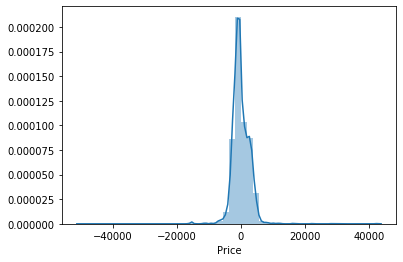

In [86]:
sns.distplot(y_test-pred)

In [87]:
import pickle

In [88]:
file=open("flight_price_regression.pkl",'wb')
pickle.dump(rf_random,file)